In [52]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
rd.seed(42)
df = pd.read_feather("../datasets/attrition.feather")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


(1470, 31)


<Axes: >

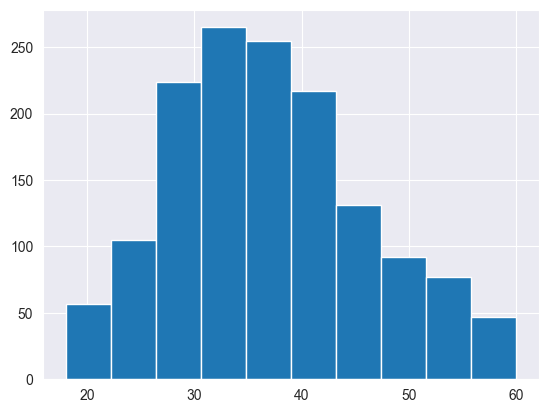

In [28]:
print(df.shape)
df["Age"].hist()

# Simple sampling

<Axes: >

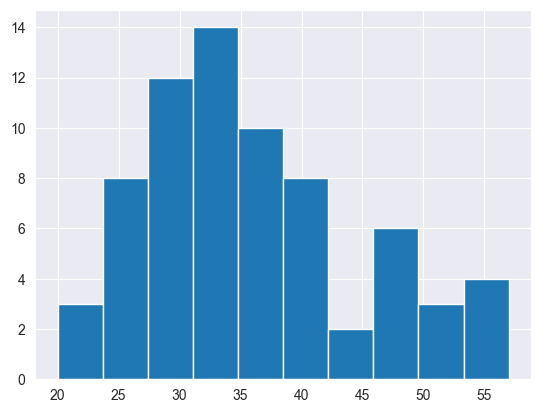

In [29]:
df_simple_samp = df.sample(n=70, random_state=42)
df_simple_samp["Age"].hist()

# Systematic sampling
Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

<Axes: >

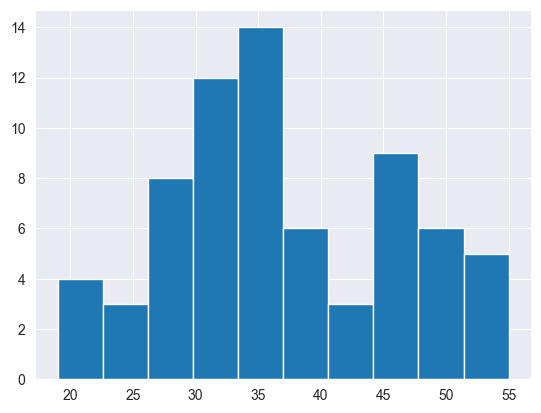

In [30]:
sample_size = 70
pop_size = len(df)
interval = pop_size // sample_size
df_sys_samp = df.iloc[::interval]
df_sys_samp["Age"].hist()

# Proportional stratified sampling

* Split the population into subgroups
* Use simple random sampling on every subgroup

The proportions of each category or subgroup will be similar between the population and sampling data.

<Axes: >

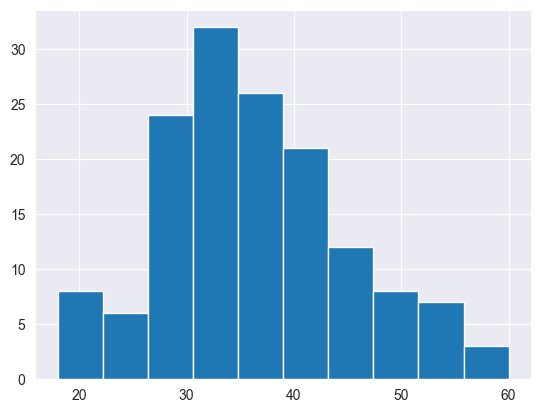

In [31]:
df_strat_samp = df.groupby("Department", observed=False).sample(frac=0.1, random_state=42)
df_strat_samp["Age"].hist()

In [32]:
df["Department"].value_counts(normalize=True)

Department
Research_Development    0.653741
Sales                   0.303401
Human_Resources         0.042857
Name: proportion, dtype: float64

In [33]:
df_strat_samp["Department"].value_counts(normalize=True)

Department
Research_Development    0.653061
Sales                   0.306122
Human_Resources         0.040816
Name: proportion, dtype: float64

# Equal counts stratified sampling
The sampling will extract n rows of each category

<Axes: >

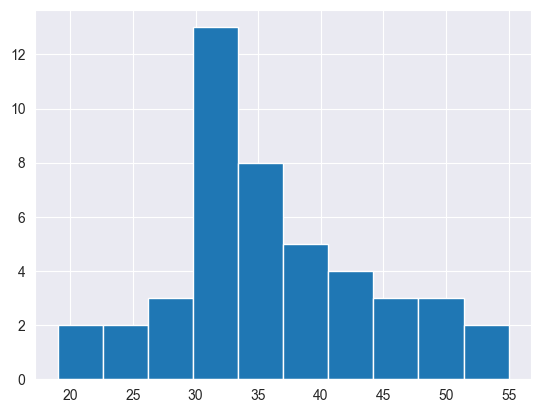

In [34]:
df_eq_strat_samp = df.groupby("Department", observed=False).sample(n=15, random_state=42)
df_eq_strat_samp["Age"].hist()

In [35]:
df["Department"].value_counts(normalize=True)

Department
Research_Development    0.653741
Sales                   0.303401
Human_Resources         0.042857
Name: proportion, dtype: float64

In [36]:
df_eq_strat_samp["Department"].value_counts(normalize=True)

Department
Human_Resources         0.333333
Research_Development    0.333333
Sales                   0.333333
Name: proportion, dtype: float64

# Weighted random sampling
Specify weights to adjust the relative probability of a row being sampled.

<Axes: >

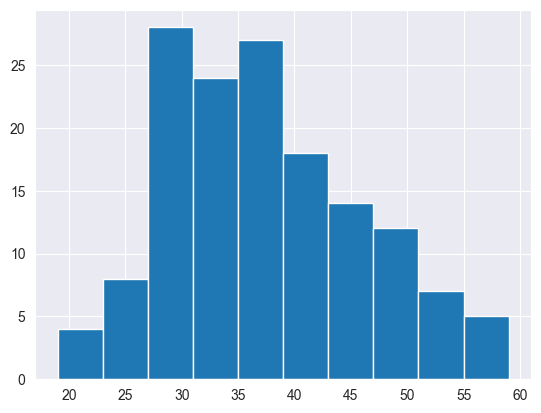

In [37]:
df_weight = df
condition = df_weight["Department"] == "Sales"
df_weight["weight"] = np.where(condition, 2, 1) # weight 2 if match - 1 don't match => 2 times the chance of beign picked
df_weight = df.sample(frac=0.1, weights="weight", random_state=42)
df_weight["Age"].hist()

In [38]:
df.value_counts("Department", normalize=True)

Department
Research_Development    0.653741
Sales                   0.303401
Human_Resources         0.042857
Name: proportion, dtype: float64

In [39]:
df_weight.value_counts("Department", normalize=True)

Department
Research_Development    0.537415
Sales                   0.435374
Human_Resources         0.027211
Name: proportion, dtype: float64

# Cluster sampling
* Use simple random sampling to pick some subgroups
* Use simple random sampling on only those subgroups

C:\Users\b061995\AppData\Local\Temp\ipykernel_21152\4183575958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["JobRole"] = df_filtered["JobRole"].cat.remove_unused_categories()
C:\Users\b061995\AppData\Local\Temp\ipykernel_21152\4183575958.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clust_samp = df_filtered.groupby("JobRole").sample(n=10, random_state=42)


<Axes: >

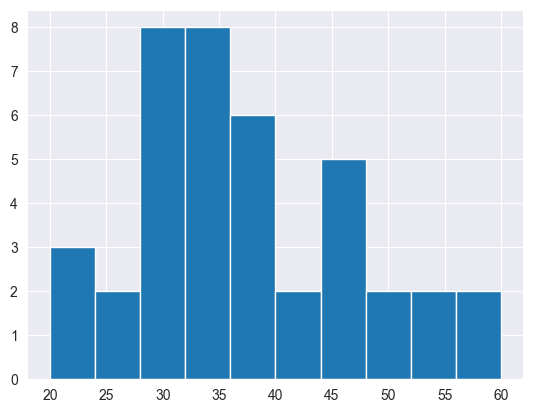

In [45]:
job_roles = list(df["JobRole"].unique())
job_roles_samp = rd.sample(job_roles, k=4)
condition = df["JobRole"].isin(job_roles_samp)
df_filtered = df[condition]
df_filtered["JobRole"] = df_filtered["JobRole"].cat.remove_unused_categories()
df_clust_samp = df_filtered.groupby("JobRole").sample(n=10, random_state=42)
df_clust_samp["Age"].hist()

# Relative error

$$
RE=100*\frac{|\text{population mean} - \text{sample mean}|}{\text{population mean}}
$$

In [50]:
attrition_srs100 = df.sample(n=100, random_state=42)
mean_attrition_srs100 = attrition_srs100["Attrition"].mean()
rel_error_pct100 = 100 * abs(df["Attrition"].mean() - mean_attrition_srs100) / df["Attrition"].mean()
print(rel_error_pct100)

24.05063291139242


# Bootstrapping

*Sampling*: going from a population to a smaller sample.

*Bootstraping*: building up a theorical population from the sample.

**Process:**

1. Make a resample of the same size as the original sample.
2. Calculate the statistic of interest for this bootstrap sample.
3. Repeat steps 1 and 2 many times.

**Bootstrap distribution mean:**

* Usually close to the sample mean.
* May not be a good estimate of the population mean. (here we use sampling distribution)
* Bootstrapping cannot correct biases from sampling.

**Standard error:** standard deviation of the statistic of interest.

* standard error * sqrt(sample_size) => population standard deviation
* Estimated standard error -> standard deviation of the bootstrap distribution for a sample statistic.
* It can be a good estimate of the population std
* Bootstrapping doesn't suffer that much from biases


<Axes: ylabel='Count'>

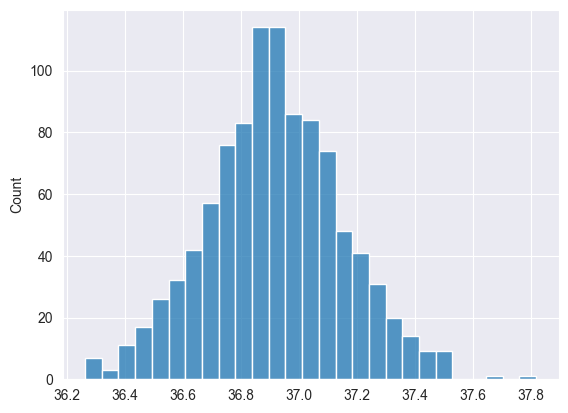

In [54]:
df_resample = df.sample(frac=1, replace=True)
means = []
for i in range(1000):
    means.append(np.mean(df.sample(frac=1, replace=True)["Age"]))
sns.histplot(means)

# Confidence 

<Axes: xlabel='Age', ylabel='Count'>

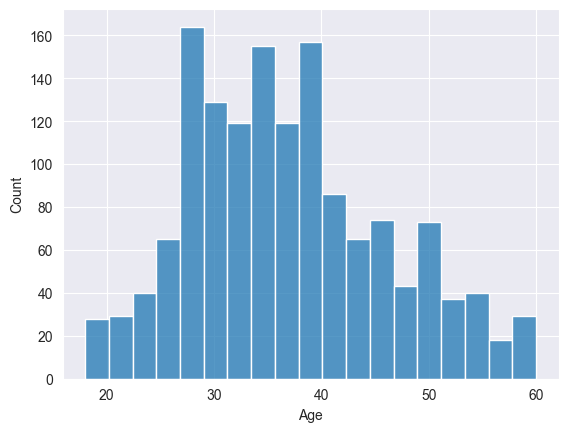

In [58]:
sns.histplot(df["Age"])

Ways to calculate:

1. Mean plus or minus one standard deviation:

In [55]:
mean = np.mean(df["Age"])
c1 = mean - np.std(df["Age"], ddof=1)
c2 = mean + np.std(df["Age"], ddof=1)
print([c1, c2])

[27.78843603467279, 46.05918301294626]


2. Quantile method for confidence intervals

In [57]:
q1 = np.quantile(df["Age"], 0.025)
q2 = np.quantile(df["Age"], 0.975)
print([q1, q2])

[21.0, 56.0]


3. Inverse cumulative distribution function - Standard error method for confidence itnerval

In [61]:
from scipy.stats import norm
point_estimate = np.mean(df["Age"])
std_error = np.std(df["Age"], ddof=1) # here we should use the standard error (std(bootstrap_distribution))
lower = norm.ppf(0.025, loc=point_estimate, scale=std_error)
upper = norm.ppf(0.975, loc=point_estimate, scale=std_error)
print([lower, upper])

[19.018806499779515, 54.82881254783953]
